## Agenda 
- Decision Tree Regressor
  
- Random Forest

## Decision Tree Regressor
  - Target-Continuous
  - Mse-Mean Squre eroor
## Evaluation metrics
   - rmse,r2_score

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
## read the data
data=pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Regression/headbrain.csv")
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [8]:
## 2.preprocessing 
data.shape

(237, 4)

In [9]:
data.isnull().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [12]:
##3. define input  and target
x=data.drop(["Brain Weight(grams)"],axis="columns")
print("Dimension of x:",np.ndim(x))
x.head()


Dimension of x: 2


,Gender,Age Range,Head Size(cm^3)
0,1,1,4512
1,1,1,3738
2,1,1,4261
3,1,1,3777
4,1,1,4177


In [15]:
y=data[["Brain Weight(grams)"]]
print("Dimension of y:",np.ndim(y))
y.head()

Dimension of y: 2


,Brain Weight(grams)
0,1530
1,1297
2,1335
3,1282
4,1590


In [16]:
from sklearn.model_selection  import train_test_split
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.2,random_state=20)

In [18]:
x_te.shape

(48, 3)

In [19]:
x_tr.shape

(189, 3)

In [20]:
## 4.Fit the data to the model 
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

In [22]:
dtr.fit(x_tr,y_tr)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [24]:
## prediction
y_pr=dtr.predict(x_te)
y_pr

array([1154., 1104., 1022., 1250., 1170., 1335., 1180., 1140., 1163.,
       1280., 1250., 1192., 1130., 1300., 1310., 1335., 1370., 1200.,
       1405., 1330., 1226., 1180., 1312., 1510., 1510., 1270., 1510.,
       1252., 1127., 1192., 1110., 1300., 1490., 1350., 1226., 1110.,
       1295., 1142., 1142., 1405., 1250., 1355., 1312., 1415., 1237.,
       1280., 1422., 1192.])

In [25]:
dtr.predict([[0,2,3]])

array([955.])

In [30]:
print(y_te.shape)
print(y_pr.shape)

(48, 1)
(48,)


In [35]:
from sklearn.metrics import r2_score
dtr.score(x_tr,y_tr)

0.9838684173754207

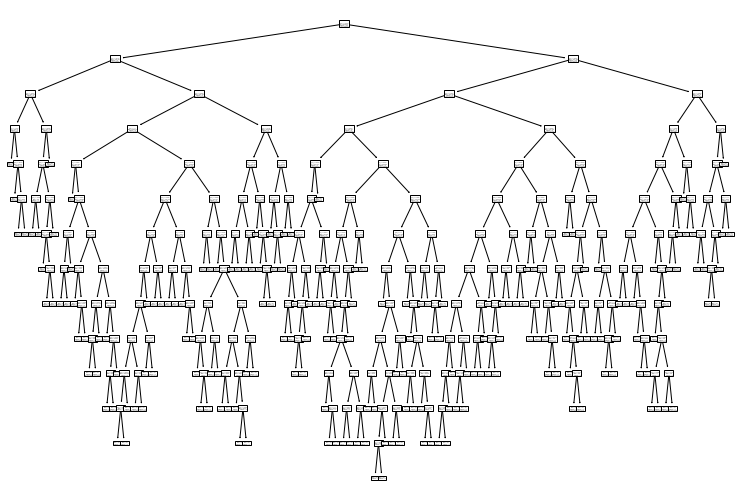

In [38]:
from sklearn import tree
plt.figure(figsize=(13,9))
tree.plot_tree(dtr)
plt.show()

## Random Forest
- Tinkamho in 1995 at bells lab
- It can be work both like regression and classification
- Tt is a ensemble model
- no of random decision tree's
- depends on majority vote from every decidion tree
- ex=
    - d1=female
    - d2=male
    - d3=male
   ==> majority=male


In [58]:
## telecom churn
df=pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Machine-Learning-Using-Python-EB8/master/Day7_23Nov2020/telecom_churn.csv")
df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [59]:
## 2.preprocessing
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
phone_number                     0
intl_plan                        0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churned                          0
dtype: int64

In [60]:
df.shape

(5000, 21)

In [61]:
## defining input and target
df.churned.value_counts()

False    4293
True      707
Name: churned, dtype: int64

In [62]:
df.drop(["state","area_code","phone_number"],inplace=True,axis="columns")
df.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [63]:
 for i in ['intl_plan','voice_mail_plan']:
        df[i]=df.replace({"yes":True,"no":False}).astype(bool)
df.head()
        

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,True,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,True,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,True,True,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,True,True,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,True,True,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [69]:
x1=df.drop(["churned"],axis="columns")
x1.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,128,True,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,True,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,True,True,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,True,True,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,True,True,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [70]:
y1=df[["churned"]]
y1.head()

,churned
0,False
1,False
2,False
3,False
4,False


In [85]:
## 4.call the model
from sklearn.model_selection  import train_test_split
x1_tr,x1_te,y1_tr,y1_te=train_test_split(x1,y1,test_size=0.2,random_state=20)
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=50)

In [86]:
rfc.fit(x1_tr,y1_tr)

C:\Users\NAGARAJU\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [87]:
pred=rfc.predict(x1_te)
#pred

In [88]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(pred,y1_te)

array([[840,  74],
       [ 12,  74]], dtype=int64)

In [89]:
accuracy_score(pred,y1_te)

0.914

In [90]:
imp=rfc.feature_importances_

<BarContainer object of 17 artists>

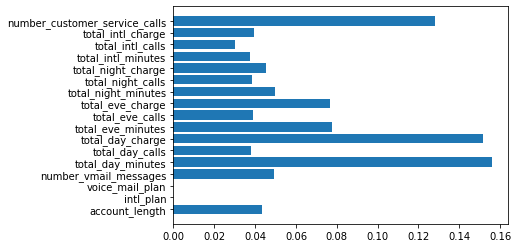

In [91]:
plt.barh(x.columns,imp)

## Random Forest Regressor
 - Target is continuous
 - No of random Decision Tree Regressor's("mse")
 - majority vote from every decision tree regressor  and finalized
 

In [103]:
data1=pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Regression/headbrain.csv")
#data1.head()
x2=data.drop(["Brain Weight(grams)"],axis="columns")
print("Dimension of x2:",np.ndim(x2))
#x2.head()
y2=data[["Brain Weight(grams)"]]
print("Dimension of y2:",np.ndim(y2))
#y2.head()
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

Dimension of x2: 2
Dimension of y2: 2


In [104]:
rfr.fit(x2,y2)

C:\Users\NAGARAJU\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [105]:
rfr.score(x2,y2)

0.9252228212141679

In [106]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x2,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
lr.score(x2,y2)

0.6528346387526655